# Time-Series Forecasting – Stock Prices

## Fetch Dataset from Yahoo Finance 

In [62]:
import datetime
import yfinance as yf
start_date = datetime.datetime(2020, 10, 1)
end_date = datetime.datetime(2025, 9, 1)
meta = yf.Ticker("AAPL")
data = meta.history(start=start_date, end=end_date)

## Export data to CSV file

In [63]:
data.to_csv("../data/AAPL_stock_data.csv")
print("Data exported to ../data/AAPL_stock_data.csv")
print(f"File saved with {len(data)} rows and {len(data.columns)} columns")

Data exported to ../data/AAPL_stock_data.csv
File saved with 1234 rows and 7 columns


## Importing libreries 

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Data Preprocessing

In [65]:
df = pd.read_csv("../data/AAPL_stock_data.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-10-01 00:00:00-04:00,114.430515,114.508334,112.669898,113.603706,116120400,0.0,0.0
1,2020-10-02 00:00:00-04:00,109.810111,112.222454,109.158392,109.936562,144712000,0.0,0.0
2,2020-10-05 00:00:00-04:00,110.802282,113.467526,110.452103,113.321617,106243800,0.0,0.0
3,2020-10-06 00:00:00-04:00,112.543451,112.951998,109.187577,110.072754,161498200,0.0,0.0
4,2020-10-07 00:00:00-04:00,111.492912,112.397540,111.016275,111.940361,96849000,0.0,0.0


In [66]:
df = df.drop(['Dividends', 'Stock Splits'], axis=1)
# Convert to datetime and then extract just the date part
df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.strftime('%Y-%m-%d')
df.head()

,Date,Open,High,Low,Close,Volume
0,2020-10-01,114.430515,114.508334,112.669898,113.603706,116120400
1,2020-10-02,109.810111,112.222454,109.158392,109.936562,144712000
2,2020-10-05,110.802282,113.467526,110.452103,113.321617,106243800
3,2020-10-06,112.543451,112.951998,109.187577,110.072754,161498200
4,2020-10-07,111.492912,112.397540,111.016275,111.940361,96849000


In [67]:
df.set_index('Date',inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1234 entries, 2020-10-01 to 2025-08-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1234 non-null   float64
 1   High    1234 non-null   float64
 2   Low     1234 non-null   float64
 3   Close   1234 non-null   float64
 4   Volume  1234 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 57.8+ KB


There is no missing value.

In [69]:
X = df.drop(['Close'], axis=1)
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
print(X)
print(y)

                  Open        High         Low     Volume
Date                                                     
2020-10-01  114.430515  114.508334  112.669898  116120400
2020-10-02  109.810111  112.222454  109.158392  144712000
2020-10-05  110.802282  113.467526  110.452103  106243800
2020-10-06  112.543451  112.951998  109.187577  161498200
2020-10-07  111.492912  112.397540  111.016275   96849000
...                ...         ...         ...        ...
2025-08-25  226.479996  229.300003  226.229996   30983100
2025-08-26  226.869995  229.490005  224.690002   54575100
2025-08-27  228.610001  230.899994  228.259995   31259500
2025-08-28  230.820007  233.410004  229.339996   38074700
2025-08-29  232.509995  233.380005  231.369995   39418400

[1234 rows x 4 columns]
Date
2020-10-01    113.603706
2020-10-02    109.936562
2020-10-05    113.321617
2020-10-06    110.072754
2020-10-07    111.940361
                 ...    
2025-08-25    227.160004
2025-08-26    229.309998
2025-08-27    23

In [71]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

                  Open        High         Low    Volume
Date                                                    
2024-03-18  174.318200  176.442941  172.282813  75604200
2023-08-24  178.917509  179.343346  174.302707  54945800
2023-12-11  191.488808  191.865622  189.812993  60943700
2023-04-25  163.141386  164.247492  161.699486  48714100
2023-12-26  191.984602  192.262250  191.211152  28919300
...                ...         ...         ...       ...
2024-11-25  230.641249  232.424910  228.927332  90152800
2025-02-11  227.642796  234.655630  227.572975  53718400
2025-04-02  220.779591  224.640136  220.480320  35905900
2024-03-05  169.542480  170.813352  168.410608  95132400
2025-03-27  220.849406  224.440621  220.021431  37094800

[987 rows x 4 columns]
Date
2024-03-18    172.481384
2023-08-24    174.669128
2023-12-11    191.558212
2023-04-25    161.738998
2023-12-26    191.429306
                 ...    
2024-11-25    232.046249
2025-02-11    232.052002
2025-04-02    223.343307
2024-

## Visualize the trends 

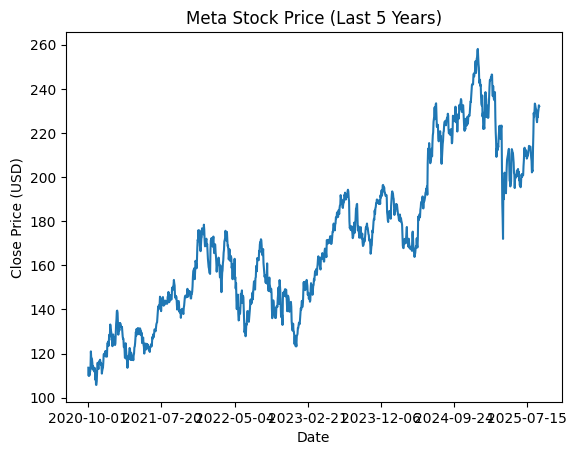

In [72]:
df['Close'].plot(title="Meta Stock Price (Last 5 Years)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.show()

Plot above shows that the price of the stock increases over time. 

## Model Implementation

### Traditional statistical model ARIMA

To apply the ARIMA model we have to check the data is stationary or not.

In [73]:
from statsmodels.tsa.stattools import adfuller

values = df['Close'].values
result = adfuller(values)

print('Augmneted Dickey_fuller Statistic: %f' % result[0])
print('p-value: %f' % result[1])

print('critical values at different levels:')
for k, v in result[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -1.428009
p-value: 0.568777
critical values at different levels:
	1%: -3.436
	5%: -2.864
	10%: -2.568


### Analysis of Stationarity Test

Result: The data is NOT stationary

p-value (0.568777) > 0.05: We fail to reject the null hypothesis of non-stationarity
ADF statistic (-1.428) is greater than critical values, indicating non-stationarity
This is expected for stock prices, which typically show trends and don't revert to a constant mean


In [74]:
df['Close_diff'] = df['Close'] - df['Close'].shift(1)
df['Close'].shift(1)

Date
2020-10-01           NaN
2020-10-02    113.603706
2020-10-05    109.936562
2020-10-06    113.321617
2020-10-07    110.072754
                 ...    
2025-08-25    227.759995
2025-08-26    227.160004
2025-08-27    229.309998
2025-08-28    230.490005
2025-08-29    232.559998
Name: Close, Length: 1234, dtype: float64

In [75]:
values = df['Close_diff'].dropna().values
result1 = adfuller(values)

print('Augmented Dickey-Fuller Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])

print('critical values at different levels:')
for k, v in result1[4].items():
    print('\t%s: %.3f' % (k, v))

Augmented Dickey-Fuller Statistic: -20.701979
p-value: 0.000000
critical values at different levels:
	1%: -3.436
	5%: -2.864
	10%: -2.568


<Axes: xlabel='Date'>

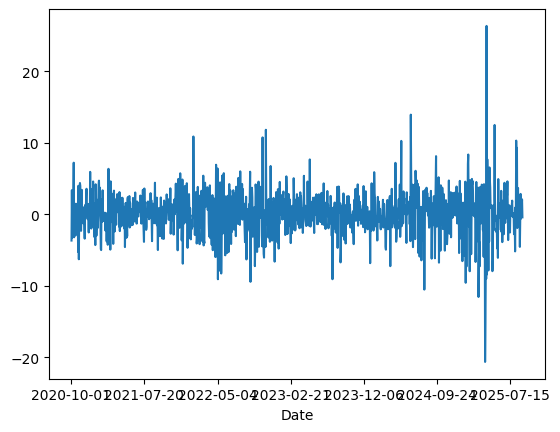

In [76]:
# let's plot to see the difference
df['Close_diff'].plot()

see the autocorellation and corelation

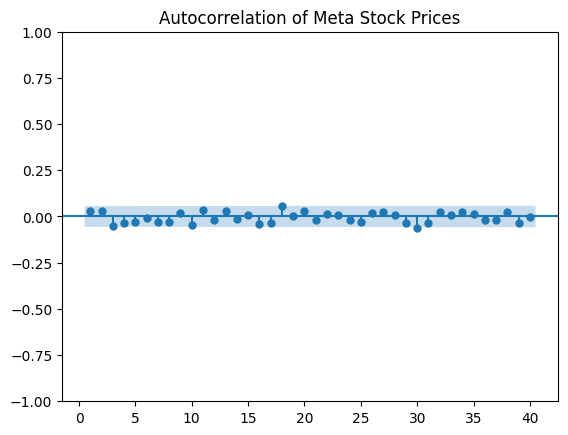

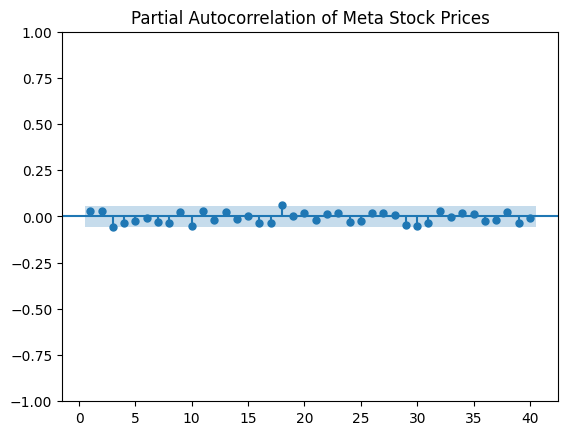

In [77]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plot_acf(df['Close_diff'].iloc[13:],lags=40
               ,title="Autocorrelation of Meta Stock Prices"
               ,zero=False
               )
fig = plot_pacf(df['Close_diff'].iloc[13:],lags=40
                ,title="Partial Autocorrelation of Meta Stock Prices"
                ,zero=False
                )

train arima model

In [82]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Close'],order=(1,1,1))
model_fit=model.fit()

In [83]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1234
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3119.754
Date:                Wed, 01 Oct 2025   AIC                           6245.509
Time:                        17:48:48   BIC                           6260.860
Sample:                             0   HQIC                          6251.284
                               - 1234                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2278      0.594      0.383      0.701      -0.937       1.392
ma.L1         -0.1983      0.599     -0.331      0.740      -1.372       0.975
sigma2         9.2308      0.189     48.862      0.000       8.861       9.601
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3176.29
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.07   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""